In [2]:
import pandas as pd

df = pd.read_excel('Online Retail.xlsx')

print(df.head())
print(df.info())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       -----------

# 🛍️ 온라인 쇼핑몰 고객 세분화 분석 (RFM)

## 1. 프로젝트 목표 및 개요
- **프로젝트 목표:** 온라인 쇼핑몰 고객 데이터를 활용하여 RFM 기반의 고객 세분화를 진행하고, 각 세그먼트별 맞춤 마케팅 전략을 제안한다.
- **데이터 소개:** UCI Machine Learning Repository의 Online Retail 데이터셋 사용 (총 541,909건의 거래 데이터)
- **분석 프로세스:**
  1. 데이터 불러오기 및 전처리
  2. 탐색적 데이터 분석 (EDA)
  3. RFM 지표 생성 및 고객 세분화
  4. 결론 및 마케팅 전략 제언

## 1. 데이터 불러오기 및 전처리

In [3]:
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [4]:
df.dropna(subset=['CustomerID'], inplace=True)
print(df.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [5]:
df = df[df['Quantity']>0]
df = df[df['UnitPrice']>0]
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,397884.000000,397884,397884.000000,397884.000000
mean,12.988238,2011-07-10 23:41:23.511023360,3.116488,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,179.331775,NaN,22.097877,1713.141560


In [6]:
df['CustomerID'] = df['CustomerID'].astype(int)
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


## 2. 탐색적 데이터 분석(EDA)

C:\Users\sangh\AppData\Local\Temp\ipykernel_17052\267207366.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_countries.index, y=top_10_countries.values, palette='viridis')


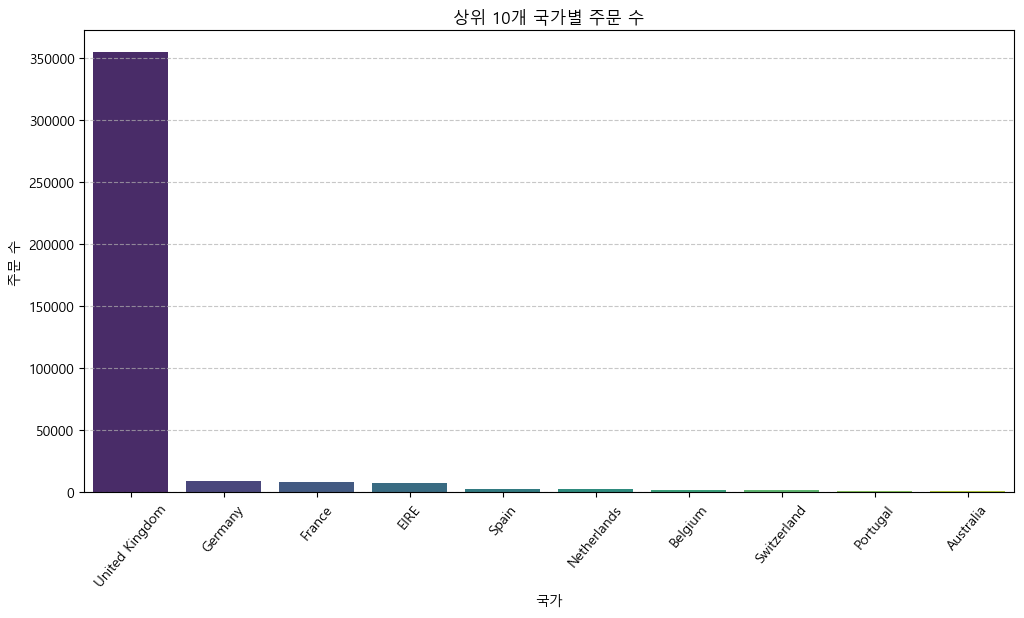

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

top_10_countries = df['Country'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_countries.index, y=top_10_countries.values, palette='viridis')

#plt.yscale('log')
plt.title('상위 10개 국가별 주문 수')
plt.xlabel('국가')
plt.ylabel('주문 수')
plt.xticks(rotation=50)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\sangh\AppData\Local\Temp\ipykernel_17052\3954942279.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df_temp['TotalPrice'].resample('M').sum()


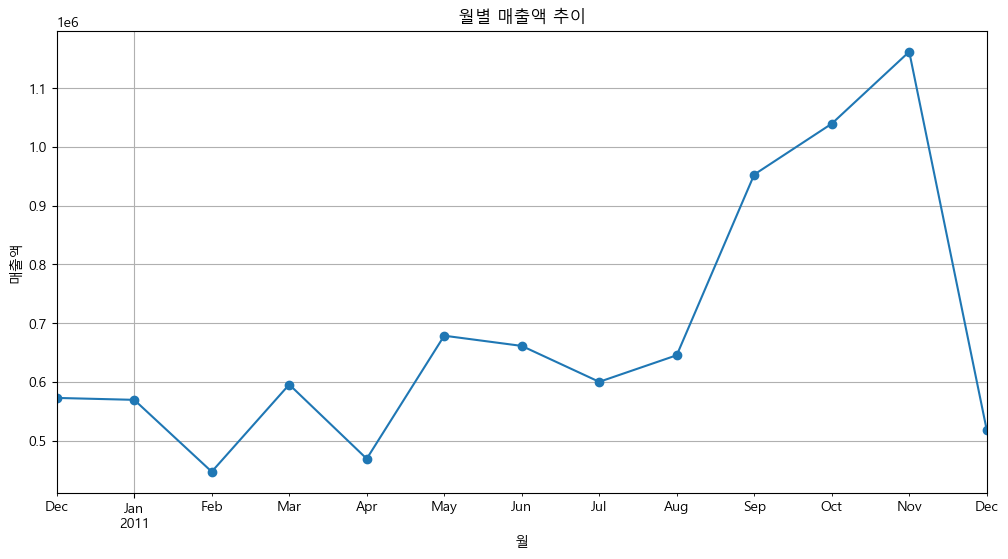

In [8]:
df_temp = df.set_index('InvoiceDate')

monthly_sales = df_temp['TotalPrice'].resample('M').sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('월별 매출액 추이')
plt.xlabel('월')
plt.ylabel('매출액')
plt.grid(True)
plt.show()

## 3. RFM 지표 생성 및 고객 세분화(Recency, Frequency, Monetary)

### 3-1. RFM 지표 계산

In [ ]:
import datetime as dt

# 마지막 거래일 + 1일
snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)
print(f"분석 기준 시점: {snapshot_date}")

분석 기준 시점: 2011-12-10 12:50:00


In [11]:
rfm_df = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda date: (snapshot_date - date.max()).days, # Recency(최근성)
    'InvoiceNo': 'nunique', # Frequency(빈도)
    'TotalPrice': 'sum' # Monetary(총 구매액)
})

rfm_df.rename(columns={'InvoiceDate': 'Recency',
                       'InvoiceNo': 'Frequency', 
                       'TotalPrice': 'Monetary'}, inplace=True)
print(rfm_df.head())


            Recency  Frequency  Monetary
CustomerID                              
12346           326          1  77183.60
12347             2          7   4310.00
12348            75          4   1797.24
12349            19          1   1757.55
12350           310          1    334.40


### 3-2. K-Means 클러스터링을 활용한 고객 세분화

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df) # 배열

rfm_scaled_df = pd.DataFrame(rfm_scaled, index = rfm_df.index, columns = rfm_df.columns)
print(rfm_scaled_df.head())

             Recency  Frequency  Monetary
CustomerID                               
12346       2.334574  -0.425097  8.358668
12347      -0.905340   0.354417  0.250966
12348      -0.175360  -0.035340 -0.028596
12349      -0.735345  -0.425097 -0.033012
12350       2.174578  -0.425097 -0.191347


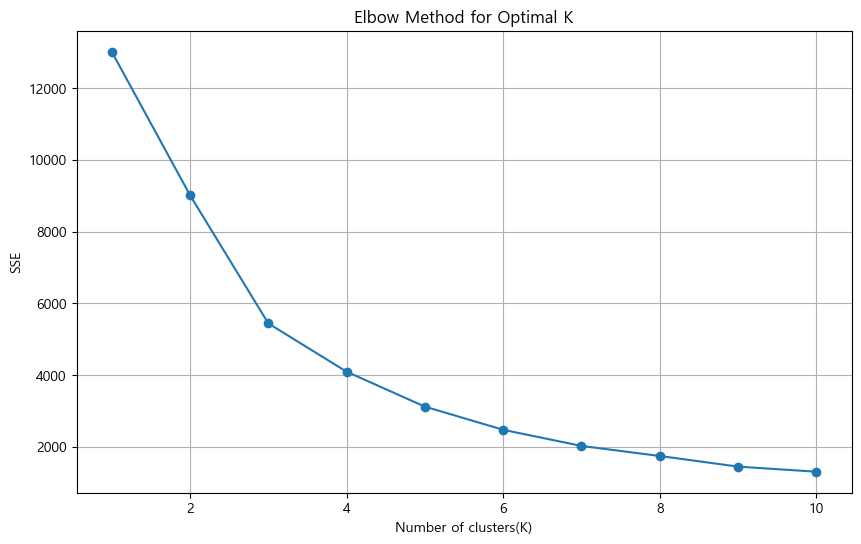

In [18]:
from sklearn.cluster import KMeans

sse=[]
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled_df)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters(K)')
plt.ylabel('SSE')
plt.grid(True)
plt.show()

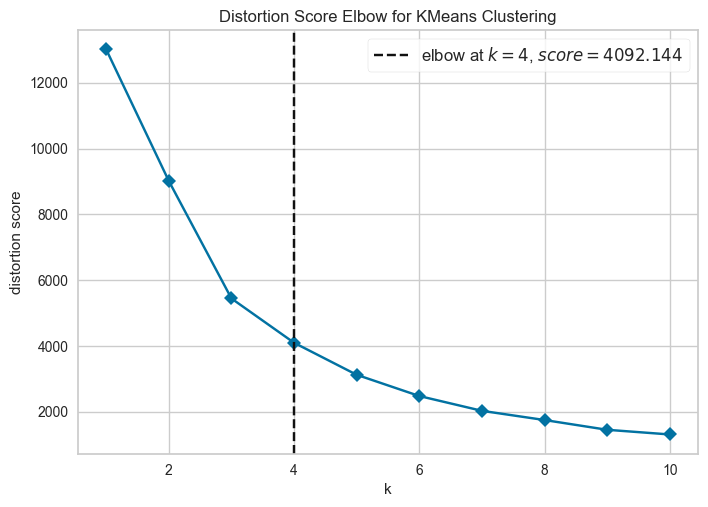

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=42, n_init=10)
visualizer = KElbowVisualizer(model, k=(1, 11), timings=False)
visualizer.fit(rfm_scaled_df)
visualizer.show()

In [22]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(rfm_scaled_df)

rfm_df['Cluster'] = kmeans.labels_
print(rfm_df.head())

            Recency  Frequency  Monetary  Cluster
CustomerID                                       
12346           326          1  77183.60        3
12347             2          7   4310.00        0
12348            75          4   1797.24        0
12349            19          1   1757.55        0
12350           310          1    334.40        1


            Recency        Frequency       Monetary
               mean count       mean           mean
Cluster                                            
0         43.702685  3054   3.682711    1359.049284
1        248.075914  1067   1.552015     480.617480
2          7.384615    13  82.538462  127338.313846
3         15.500000   204  22.333333   12709.090490


C:\Users\sangh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sangh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sangh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sangh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\

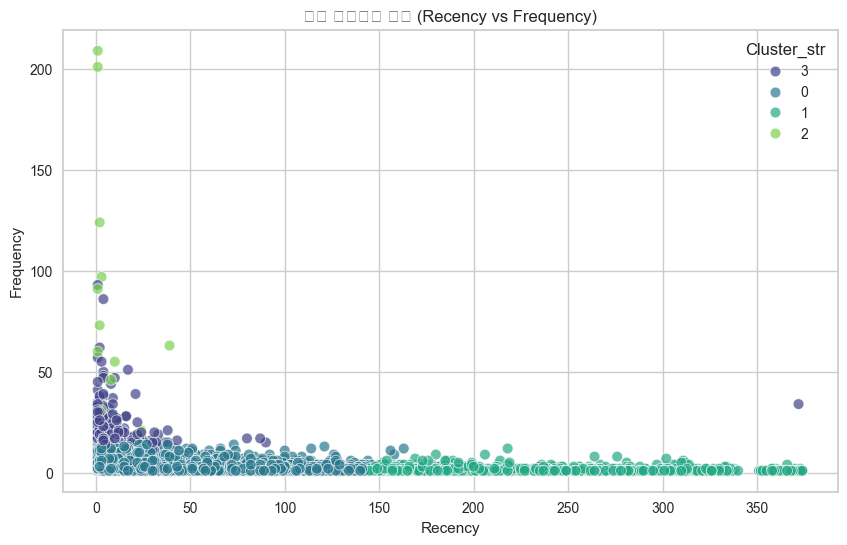

In [25]:
cluster_summary = rfm_df.groupby('Cluster').agg({
    'Recency': ['mean', 'count'],
    'Frequency': 'mean',
    'Monetary': 'mean',
})
print(cluster_summary)

rfm_df['Cluster_str'] = rfm_df['Cluster'].astype(str)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm_df, x='Recency', y='Frequency', hue='Cluster_str', palette='viridis', s=60, alpha=0.7)
plt.title('고객 세그먼트 분포 (Recency vs Frequency)')
plt.show()

## 4. 결론 및 마케팅 전략 제언

### 4-1. 분석 결론 요약
이번 프로젝트에서는 온라인 리테일 데이터를 활용하여 RFM 지표를 생성하고, K-Means 클러스터링을 통해 고객을 4개의 의미 있는 그룹으로 성공적으로 세분화했습니다.

분석 결과, 소수의 '슈퍼 VIP/B2B' 그룹과 '충성 VIP' 그룹이 매출의 상당 부분을 차지하고 있음을 확인했습니다. 또한, 가장 큰 비중을 차지하는 '잠재 고객' 그룹과 관리가 시급한 '이탈 우려 고객' 그룹을 식별하여 각 그룹의 특성을 명확히 파악할 수 있었습니다.

### 4-2. 세그먼트별 마케팅 전략 제언 🎯

👑 Cluster 2: B2B / 슈퍼 VIP 고객

전략 목표: 파트너십 수준의 관계 유지 및 강화

핵심 메시지: "귀사는 저희의 가장 중요한 파트너입니다."

전담 계정 관리자(AM) 배정: 1:1 맞춤형 관리 및 커뮤니케이션 채널 제공

B2B 전용 가격 정책: 사업자 고객을 위한 특별 단가 및 대량 구매 할인 제공

맞춤 주문 시스템: 간편한 대량 주문 및 결제 프로세스 지원


🌟 Cluster 3: 충성도 높은 VIP 고객

전략 목표: 최상위 충성도 유지 및 감사의 표시

핵심 메시지: "항상 저희와 함께해주셔서 감사합니다."

VIP 전용 멤버십 운영: 등급별 포인트 제도, 승급 시 특별 선물 증정

독점적 혜택 제공: 신제품 우선 체험 기회, 한정판 상품 선주문 혜택

개인화된 감사 마케팅: 손편지, 생일 선물 등 감성적인 접근

🌱 Cluster 0: 잠재적 충성 고객

전략 목표: 구매 빈도 및 평균 구매 단가(AOV) 증대

핵심 메시지: "더 좋은 상품들로 고객님의 일상을 채워보세요."

개인화 상품 추천: 과거 구매 이력을 바탕으로 한 상품 추천 이메일 발송

업셀링/크로스셀링: 함께 구매하면 좋은 상품 제안, 특정 금액 이상 구매 시 무료 배송

참여 유도 캠페인: 상품 후기 작성 시 포인트 추가 적립 등

💔 Cluster 1: 이탈 우려 고객

전략 목표: 고객 재활성화(Reactivation) 및 이탈 원인 파악

핵심 메시지: "오랫동안 뵙지 못해 아쉬워요. 다시 돌아오시길 바라며 선물을 준비했어요."

재방문 유도 쿠폰: "돌아오세요! 20% 할인 쿠폰" 등 파격적인 할인 혜택 제공

'We miss you' 캠페인: 고객의 관심 상품 재입고 알림 등 개인화된 메시지 발송

이탈 원인 설문: 간단한 설문을 통해 서비스 개선점 파악 및 피드백 제공 고객에게 리워드 지급